## Training Models

1)  Normal Equation으로 parameter 구하기 실습

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

X = 2*np.random.rand(100,1)
y = 4+3*X+np.random.rand(100,1)


In [2]:
X_b = np.c_[np.ones((100,1)), X]

In [3]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[ 4.51359766],
       [ 2.98323418]])

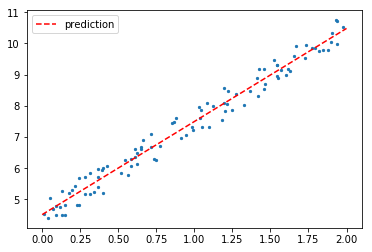

In [4]:
plt.scatter(X, y, s = 5)
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones([2,1]), X_new]
plt.plot(X_new, X_new_b.dot(theta_best), 'r--', label = 'prediction')
plt.legend()
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_
lin_reg.predict(X_new)

array([[  4.51359766],
       [ 10.48006601]])

In [6]:
eta = 0.1 # learning_rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)

## Gradient Descent 구하기

In [7]:
#Gradient descent
for iteration in range(1,n_iterations):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta*gradients

In [8]:
theta = np.random.randn(2,1)
theta

array([[ 0.29307247],
       [-0.71435142]])

In [9]:
np.random.randint(m)

92

In [10]:
#Stochastic GD
n_epochs = 50 
t0, t1 = 5, 50

def learning_schedule(t):
    return t0/(t+t1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        random_number = np.c_[1,X[random_index]]
        gradients = 2*random_number.T.dot(random_number.dot(theta) - y[random_index])
        theta = theta - learning_schedule(epoch*m + i)*gradients

In [11]:
theta

array([[ 4.52011866],
       [ 2.98469083]])

In [12]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter = 50, alpha = 0.01, eta0 = 0.01)
sgd_reg.fit(X, y.ravel())  #scikit-learn 함수에서는 자동으로 X에 1 column 더해주나보네 

SGDRegressor(alpha=0.01, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=50, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

## Polynmial regression

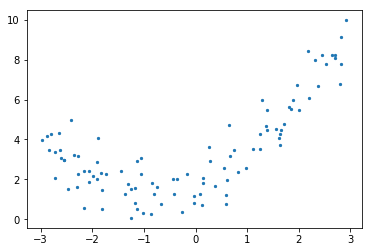

In [13]:
np.random.seed(42)
m = 100
X = 6*np.random.rand(m, 1) - 3  #random.rand : matrix 형태로 준다.
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

plt.scatter(X, y, s = 5)
plt.show()

In [14]:
# 1개 값(X)만 있는 걸 전처리해서 X, X**2 로 만들어준다. 
from sklearn.preprocessing import PolynomialFeatures 
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)

In [15]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([ 1.78134581]), array([[ 0.93366893,  0.56456263]]))

In [16]:
lin_reg.coef_[0]

array([ 0.93366893,  0.56456263])

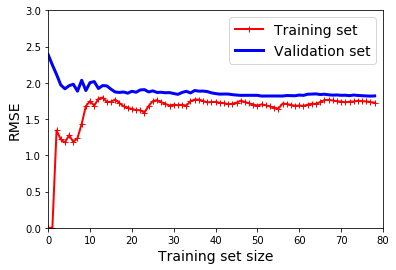

In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Training set")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])
plt.show()


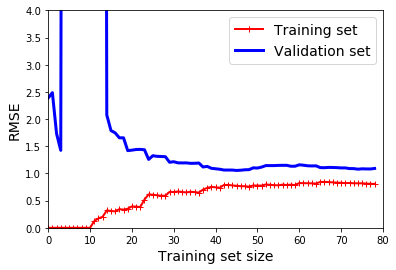

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

polynomial_regression = Pipeline((
    ('poly_features', PolynomialFeatures(degree = 10, include_bias = False)),
    ('standardscaler', StandardScaler()),
    ('sgd_reg', LinearRegression()),
        ))
plot_learning_curves(polynomial_regression, X,y)
plt.axis([0, 80, 0, 4])
plt.show()

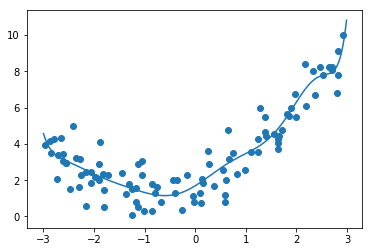

In [19]:
X_sample = np.arange(-3, 3, 0.01).reshape(-1,1)
y_sample = polynomial_regression.predict(X_sample)
plt.plot(X_sample, y_sample)
plt.scatter(X,y)
plt.show()

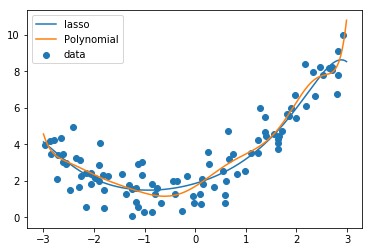

In [20]:
#Lasso는 SGDRegressor로 하면 될 듯함.
lasso = Pipeline((
    ('polynomial_features', PolynomialFeatures(degree = 10, include_bias = False)),
    ('standardscaler', StandardScaler()),
    ('SGDregressor', SGDRegressor(alpha = 0.01, penalty = 'l2', n_iter = 100)),
        ))

lasso_reg = lasso.fit(X,y.ravel())
plt.plot(X_sample, lasso_reg.predict(X_sample), label = 'lasso')
plt.scatter(X, y, label = 'data')
plt.plot(X_sample, y_sample, label = 'Polynomial')
plt.legend()
plt.show()

## Early Stopping

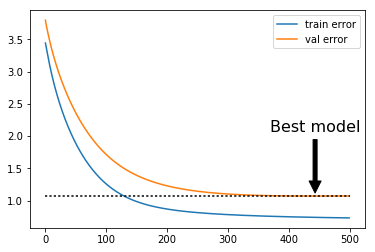

In [21]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_feature = Pipeline((
    ('polyfeature', PolynomialFeatures(degree = 90,include_bias = False)),
    ('StandardScaler', StandardScaler()),
    ))

X_train_poly = poly_feature.fit_transform(X_train)
X_val_poly = poly_feature.fit_transform(X_val)

sgd_reg = SGDRegressor(n_iter = 1, warm_start = True, #warm_start가 게속 진행되게 해줌. 없으면 처음부터 다시
                       penalty = None, learning_rate = 'constant', eta0 = 0.0005, random_state = 42)

train_error = []
val_error = []

epoch = 500

for epoc in range(epoch):
    sgd_reg.fit(X_train_poly, y_train)
    train_pred = sgd_reg.predict(X_train_poly)
    val_pred = sgd_reg.predict(X_val_poly)
    train_score = mean_squared_error(train_pred, y_train)
    val_score = mean_squared_error(val_pred, y_val)
    train_error.append(train_score)
    val_error.append(val_score)
    
train_error = np.sqrt(train_error)
val_error = np.sqrt(val_error)
best_epoch = np.argmin(val_error)
best_error = val_error[best_epoch]

plt.plot(range(epoch), train_error, label = 'train error')
plt.plot(range(epoch), val_error, label = 'val error')
plt.annotate('Best model', xy = (best_epoch, best_error), 
             xytext=(best_epoch, best_error + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16)
plt.plot([0, epoch], [best_error, best_error], 'k:')
plt.legend()
plt.show() 


In [22]:
best_epoch

443

## Logistic Regression

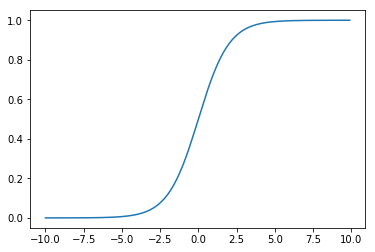

In [23]:
def sigmoid(x):
    return(1/(1+np.exp(-x)))

plt.plot(np.arange(-10,10,0.1), sigmoid(np.arange(-10,10,0.1)))
plt.show()

In [24]:
from sklearn import datasets
iris = datasets.load_iris()

In [25]:
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [26]:
X = iris['data'][:,3:]
y = (iris['target'] == 2).astype(np.int) # 2인거랑 아닌거랑 구분하려고 Boolean 만들고 int로 바꾸네 신기..

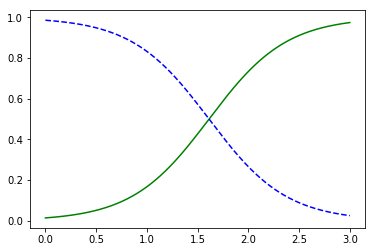

In [27]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1], 'g-', label = 'iris-Virginica')
plt.plot(X_new, y_proba[:,0], 'b--', label = 'Not iris-Virginica')
plt.show()

In [28]:
log_reg.coef_

array([[ 2.61727777]])

In [29]:
X = iris['data'][:,2:]
y = (iris['target'] == 2).astype(np.int)

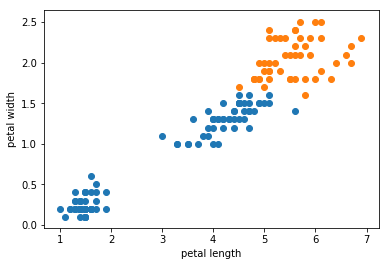

In [30]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

X_pred = log_reg.predict(X)

plt.scatter(X[X_pred == 0][:,0], X[X_pred == 0][:,1])
plt.scatter(X[X_pred == 1][:,0], X[X_pred == 1][:,1])
plt.xlabel('petal length')
plt.ylabel('petal width')

In [37]:
X = iris['data'][:,(2,3)]
y = iris['target']

softmax_reg = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', C = 10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [40]:
softmax_reg.score(X, y)

0.95999999999999996